Start off with single parallel for each nested for loop
Then created nested parallelism and see if it improve

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

def generateDataFrames(filename):
    times = [[],[],[]]

    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split(',')
            for idx, value in enumerate(data):
                times[idx % 3].append(float(value.strip()))


    df = pd.DataFrame({
        'time_serial': times[0],
        'time_logn': times[1],
        'time_n': times[2],
    })
    return df

def filterData(df):
    for time_col in ['time_serial', 'time_logn', 'time_n']:
        Q1 = df[time_col].quantile(0.25)
        Q3 = df[time_col].quantile(0.75)
        IQR = Q3 - Q1

        # Apply IQR filtering to each column
        df = df[~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

    return df

def add_execution_times(pairs, label=None, color='black', style=''):
    pairs.sort(key=lambda x: int(x[0]))

    cores = [int(pair[0]) for pair in pairs]
    times = [pair[1] for pair in pairs]

    plt.plot(cores, times, style, label=label, color=color)
    
    if label:
        plt.legend()


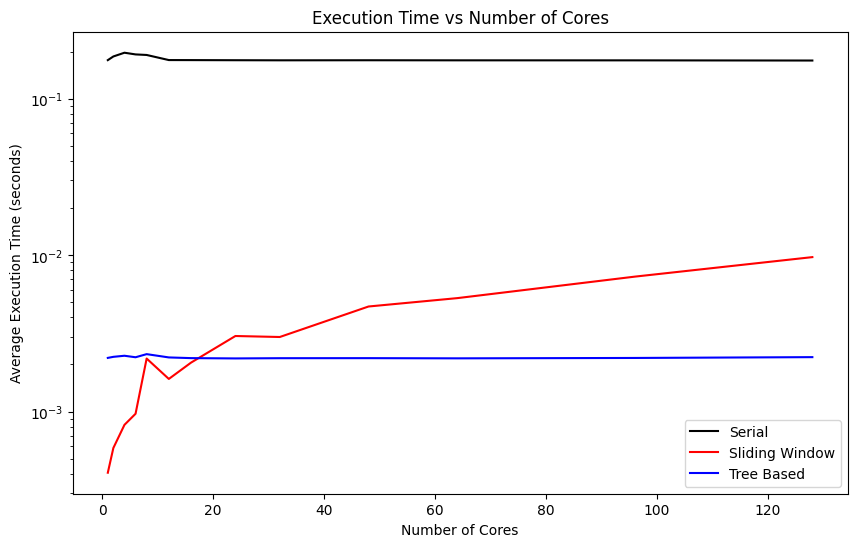

In [66]:
data_filepath = 'results2/'

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Cores')
plt.ylabel('Average Execution Time (seconds)')
plt.yscale('log')

plt.title('Execution Time vs Number of Cores')


pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["time_serial"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Serial", "black")

pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["time_logn"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Sliding Window", "red")

pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["time_n"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Tree Based", "blue")



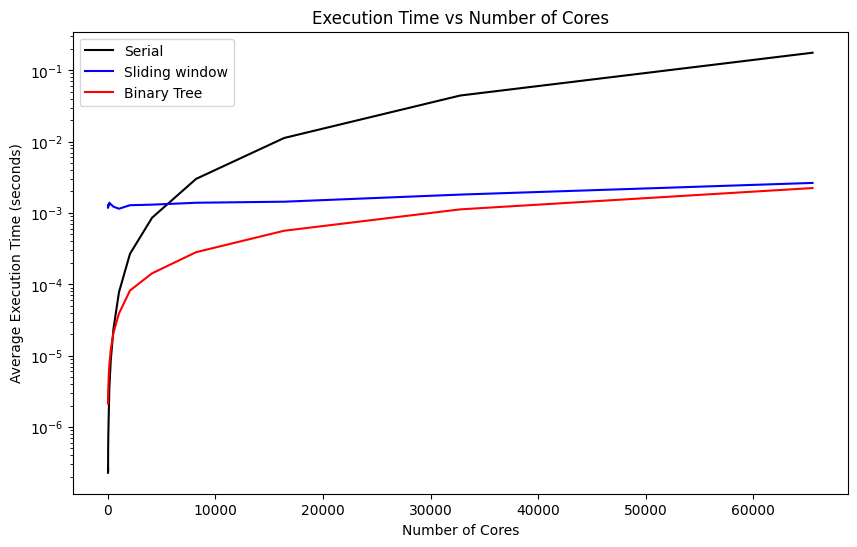

In [57]:
data_filepath = 'size-results/'

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Cores')
plt.ylabel('Average Execution Time (seconds)')
plt.yscale('log')

plt.title('Execution Time vs Number of Cores')


pairs = []
for filename in os.listdir(data_filepath):
    shortfilename = filename.split("32-")[1]
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (shortfilename.split(".")[0], data["time_serial"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Serial", "black")

pairs = []
for filename in os.listdir(data_filepath):
    shortfilename = filename.split("32-")[1]
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (shortfilename.split(".")[0], data["time_logn"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Sliding window", "blue")

pairs = []
for filename in os.listdir(data_filepath):
    shortfilename = filename.split("32-")[1]
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (shortfilename.split(".")[0], data["time_n"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Binary Tree", "red")